In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
import scipy.stats as stats

In [2]:
data = pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [4]:
print(data.head())

   id class  cap-diameter cap-shape cap-surface cap-color  \
0   0     e          8.80         f           s         u   
1   1     p          4.51         x           h         o   
2   2     e          6.94         f           s         b   
3   3     e          3.88         f           y         g   
4   4     e          5.85         x           l         w   

  does-bruise-or-bleed gill-attachment gill-spacing gill-color  ...  \
0                    f               a            c          w  ...   
1                    f               a            c          n  ...   
2                    f               x            c          w  ...   
3                    f               s          NaN          g  ...   
4                    f               d          NaN          w  ...   

   stem-root  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0        NaN           NaN          w       NaN        NaN        f         f   
1        NaN             y          o       

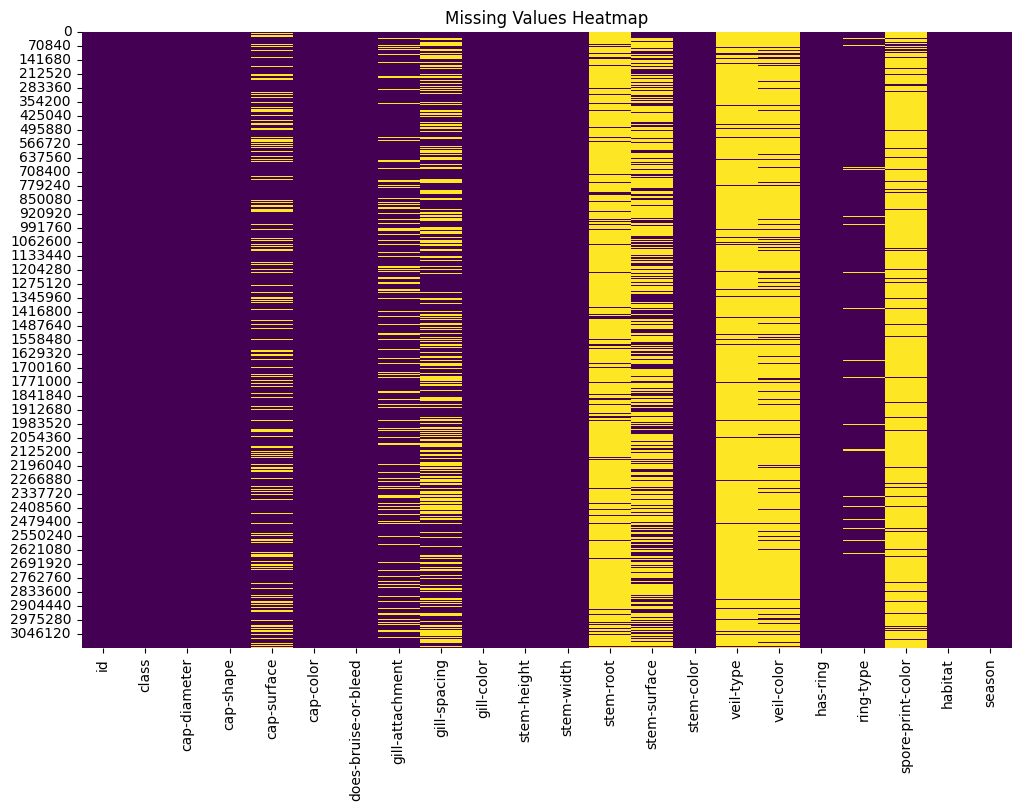

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [6]:
# Summary statistics for numerical features
print(data.describe())


                 id  cap-diameter   stem-height    stem-width
count  3.116945e+06  3.116941e+06  3.116945e+06  3.116945e+06
mean   1.558472e+06  6.309848e+00  6.348333e+00  1.115379e+01
std    8.997847e+05  4.657931e+00  2.699755e+00  8.095477e+00
min    0.000000e+00  3.000000e-02  0.000000e+00  0.000000e+00
25%    7.792360e+05  3.320000e+00  4.670000e+00  4.970000e+00
50%    1.558472e+06  5.750000e+00  5.880000e+00  9.650000e+00
75%    2.337708e+06  8.240000e+00  7.410000e+00  1.563000e+01
max    3.116944e+06  8.067000e+01  8.872000e+01  1.029000e+02


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

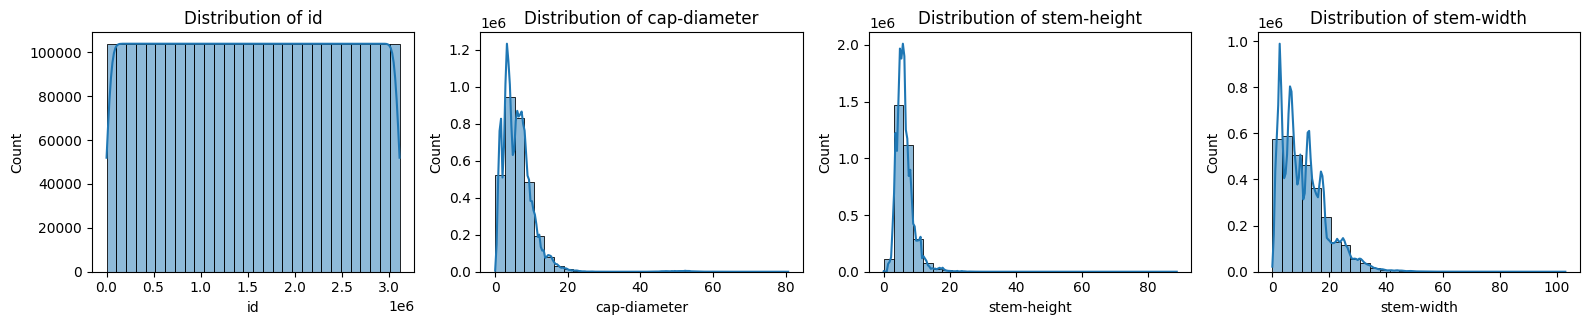

In [7]:
# Distribution of numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


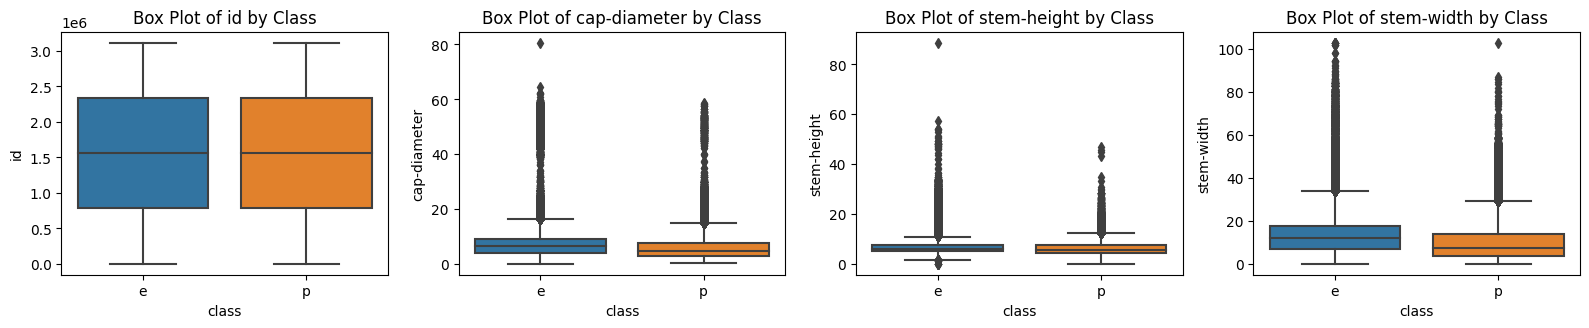

In [8]:
# Box plots for numerical features
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='class', y=feature, data=data)
    plt.title(f'Box Plot of {feature} by Class')
plt.tight_layout()
plt.show()


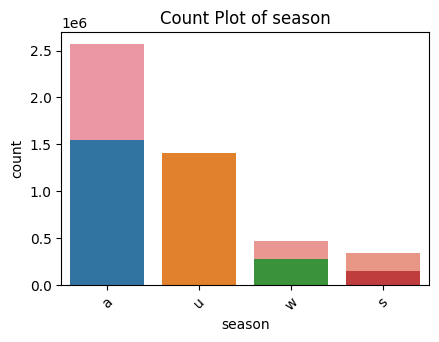

In [9]:
# Analysis of categorical features
categorical_features = data.select_dtypes(include=['object']).columns
plt.figure(figsize=(17, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, 16)
    sns.countplot(x=feature, data=data, order=data[feature].value_counts().index)
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
# Compute correlation between categorical variables and target
import scipy.stats as stats

cat_features = data.select_dtypes(include=['object']).columns
correlations = {}
for feature in cat_features:
    contingency_table = pd.crosstab(data[feature], data['class'])
    chi2, p, _, _ = stats.chi2_contingency(contingency_table)
    correlations[feature] = chi2
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
print("Chi-Squared Test Correlations with Target Class:")
for feature, chi2_value in sorted_correlations:
    print(f"{feature}: {chi2_value:.4f}")


Chi-Squared Test Correlations with Target Class:
class: 3116940.9641
cap-color: 208410.4672
stem-color: 206409.5401
cap-surface: 196261.2379
gill-color: 150920.8934
gill-attachment: 147464.4733
stem-surface: 144948.8792
ring-type: 115736.2350
habitat: 98422.1445
stem-root: 97654.8240
veil-color: 92466.9390
cap-shape: 87533.8977
season: 69393.1671
spore-print-color: 48444.3137
gill-spacing: 36586.1700
has-ring: 7715.8415
does-bruise-or-bleed: 4432.4693
veil-type: 22.3991


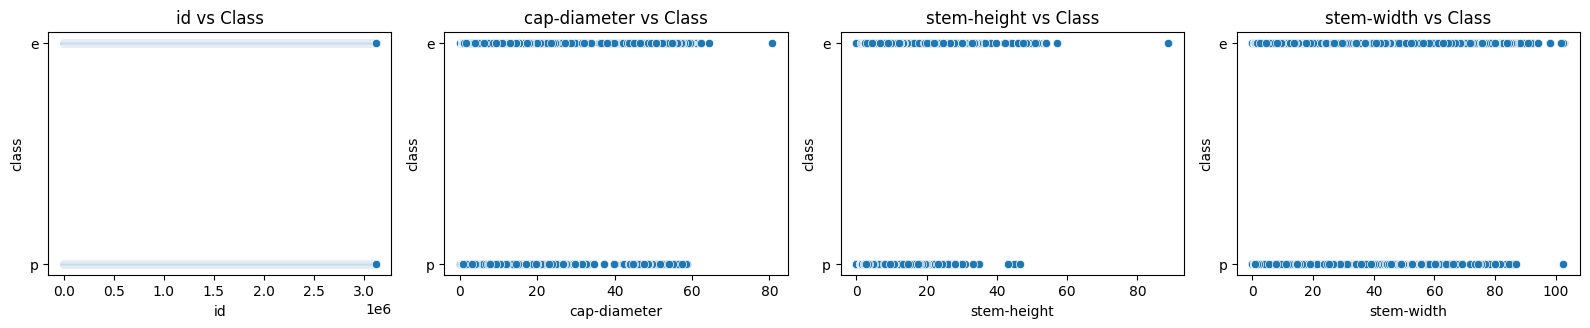

In [11]:
# Scatter plots of target vs. numerical features
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(x=feature, y='class', data=data)
    plt.title(f'{feature} vs Class')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

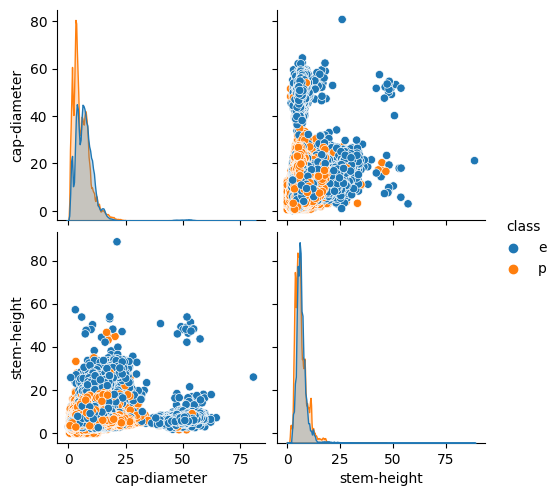

In [12]:
# Pairwise comparisons of features colored by class
pairwise_features = ['cap-diameter', 'cap-shape', 'cap-color', 'stem-height']
sns.pairplot(data[pairwise_features + ['class']], hue='class')
plt.show()

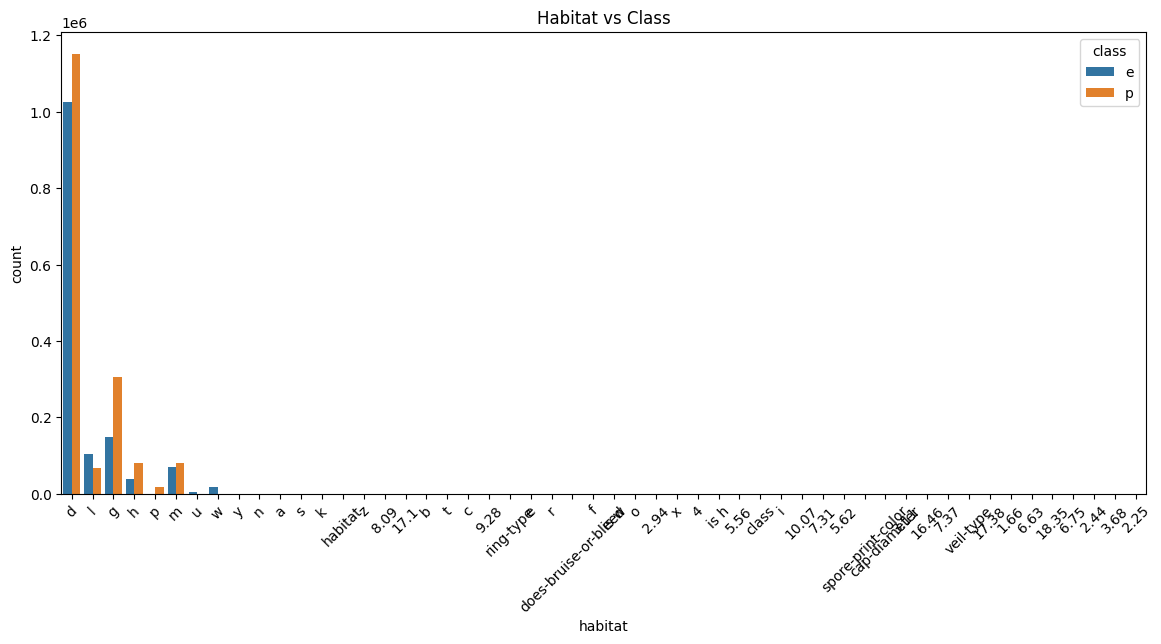

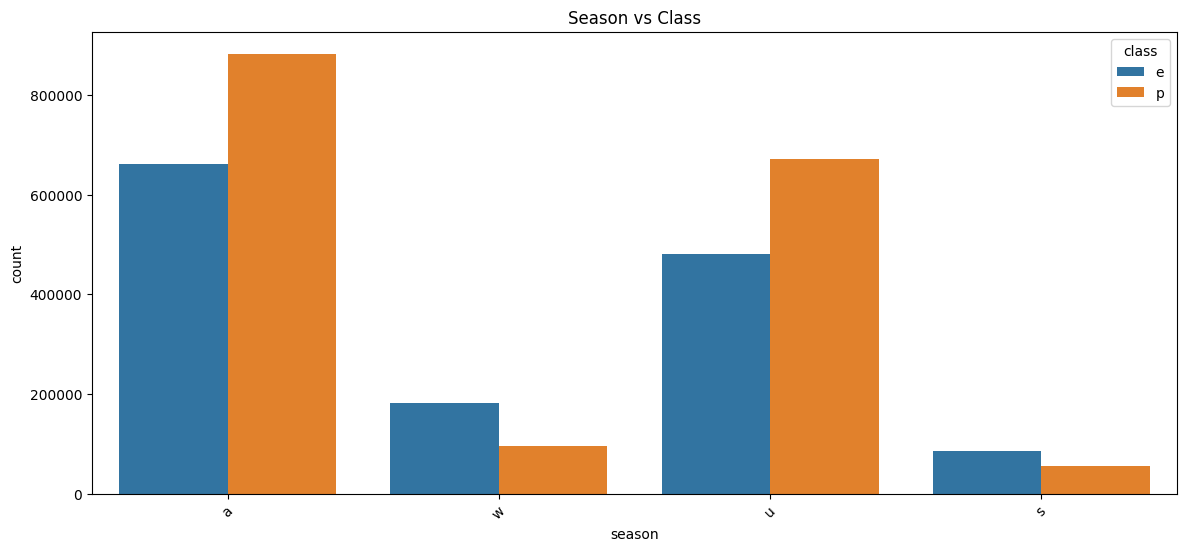

In [13]:
# Analysis of habitat and season effects on the target variable
plt.figure(figsize=(14, 6))
sns.countplot(x='habitat', hue='class', data=data)
plt.title('Habitat vs Class')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(14, 6))
sns.countplot(x='season', hue='class', data=data)
plt.title('Season vs Class')
plt.xticks(rotation=45)
plt.show()


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [15]:
data.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [16]:
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    if col != 'class':  # Skip the target variable
        data[col] = le.fit_transform(data[col])


In [17]:
class_le = LabelEncoder()
data['class'] = class_le.fit_transform(data['class'])

In [18]:
data=data.fillna(0)

In [19]:
# Split the data
X = data.drop(columns=['id', 'class'])
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(learning_rate=0.1, iterations=100, depth=6, silent=True),
    'LightGBM': LGBMClassifier()
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name}: {accuracy:.4f}")


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.6213
Random Forest: 0.9920
Gradient Boosting: 0.9288
AdaBoost: 0.8000
Extra Trees: 0.9915
XGBoost: 0.9912
CatBoost: 0.9871
[LightGBM] [Info] Number of positive: 1364404, number of negative: 1129152
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.310919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 2493556, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547172 -> initscore=0.189251
[LightGBM] [Info] Start training from score 0.189251
LightGBM: 0.9888


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


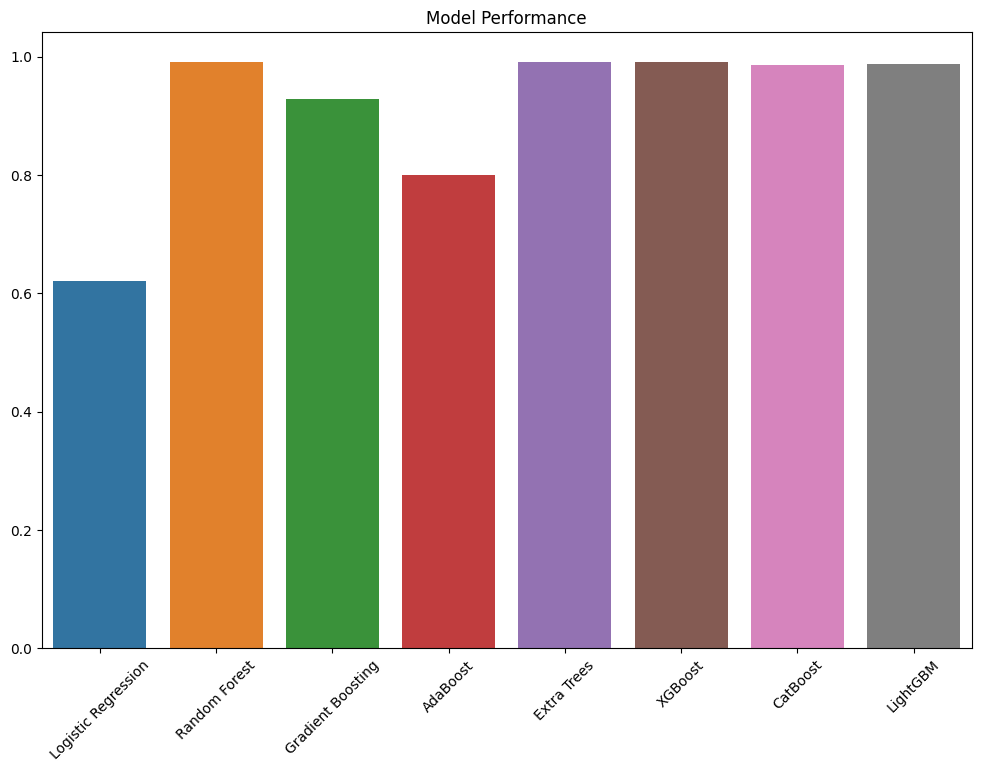

In [21]:
# Bar plot of model performance
plt.figure(figsize=(12, 8))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Performance')
plt.xticks(rotation=45)
plt.show()

In [22]:
X = data.drop(columns=['id', 'class'])
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
# Load test dataset
test_data = pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv')

In [25]:
# Identify and convert columns with mixed data types in the test dataset
for col in test_data.columns:
    if test_data[col].dtype == 'object':
        unique_types = test_data[col].apply(type).value_counts()
        if len(unique_types) > 1:
            print(f"Column '{col}' has mixed types: {unique_types}")

Column 'cap-shape' has mixed types: cap-shape
<class 'str'>      2077933
<class 'float'>         31
Name: count, dtype: int64
Column 'cap-surface' has mixed types: cap-surface
<class 'str'>      1631060
<class 'float'>     446904
Name: count, dtype: int64
Column 'cap-color' has mixed types: cap-color
<class 'str'>      2077951
<class 'float'>         13
Name: count, dtype: int64
Column 'does-bruise-or-bleed' has mixed types: does-bruise-or-bleed
<class 'str'>      2077954
<class 'float'>         10
Name: count, dtype: int64
Column 'gill-attachment' has mixed types: gill-attachment
<class 'str'>      1728143
<class 'float'>     349821
Name: count, dtype: int64
Column 'gill-spacing' has mixed types: gill-spacing
<class 'str'>      1238369
<class 'float'>     839595
Name: count, dtype: int64
Column 'gill-color' has mixed types: gill-color
<class 'str'>      2077915
<class 'float'>         49
Name: count, dtype: int64
Column 'stem-root' has mixed types: stem-root
<class 'float'>    1838012

In [26]:
for col in test_data.columns:
    if test_data[col].dtype == 'object':
        test_data[col] = test_data[col].astype(str)

In [27]:
# Encode categorical features in the test dataset
for col in test_data.select_dtypes(include=['object']).columns:
    test_data[col] = le.fit_transform(test_data[col])
    
# Prepare test data for prediction
X_test_final = test_data.drop(columns=['id'])


In [28]:
test_data.fillna('missing', inplace=True)
X_test_final = X_test_final.fillna(0)

/tmp/ipykernel_24/60207686.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'missing' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test_data.fillna('missing', inplace=True)


In [29]:
# Predict on the test dataset
test_predictions = rf_model.predict(X_test_final)
test_predictions = class_le.inverse_transform(test_predictions)
# Prepare the submission DataFrame
submission = pd.DataFrame({
    'id': test_data['id'],
    'class': test_predictions
})
# Save the predictions to a CSV file
submission.to_csv('submission.csv', index=False)
print("Predictions saved to submission.csv")

Predictions saved to submission.csv
